<a href="https://colab.research.google.com/github/mahima8178/Audio-Visual-Cryptography-using-AES-RSA/blob/main/on_Image(jpg)_Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [3]:
%cd /content/drive/My Drive/Kaggle

/content/drive/My Drive/Kaggle


In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

**LOAD IMAGE**

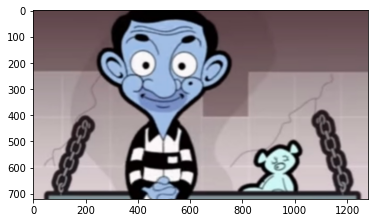

In [21]:

my_img = cv2.imread('images/mrbean11.jpg')
# cv2_imshow(my_img)
plt.imshow(my_img, cmap="gray")

**RSA**

**STEP 1: Generate Two Large Prime Numbers (p,q) randomly**

In [22]:
#RSA

# STEP 1: Generate Two Large Prime Numbers (p,q) randomly
from random import randrange, getrandbits


def power(a,d,n):
  ans=1;
  while d!=0:
    if d%2==1:
      ans=((ans%n)*(a%n))%n
    a=((a%n)*(a%n))%n
    d>>=1
  return ans;


def MillerRabin(N,d):
  a = randrange(2, N - 1)
  x=power(a,d,N);
  if x==1 or x==N-1:
    return True;
  else:
    while(d!=N-1):
      x=((x%N)*(x%N))%N;
      if x==1:
        return False;
      if x==N-1:
        return True;
      d<<=1;
  return False;


def is_prime(N,K):
  if N==3 or N==2:
    return True;
  if N<=1 or N%2==0:
    return False;
  
  #Find d such that d*(2^r)=X-1
  d=N-1
  while d%2!=0:
    d/=2;

  for _ in range(K):
    if not MillerRabin(N,d):
      return False;
  return True;  
  



def generate_prime_candidate(length):
  # generate random bits
  p = getrandbits(length)
  # apply a mask to set MSB and LSB to 1
  # Set MSB to 1 to make sure we have a Number of 1024 bits.
  # Set LSB to 1 to make sure we get a Odd Number.
  p |= (1 << length - 1) | 1
  return p



def generatePrimeNumber(length):
  A=4
  while not is_prime(A, 128):
        A = generate_prime_candidate(length)
  return A



length=5
P=generatePrimeNumber(length)
Q=generatePrimeNumber(length)

print(P)
print(Q)

17
19


**Step 2: Calculate N=P*Q and Euler Totient Function = (P-1)*(Q-1)**

In [23]:
#Step 2: Calculate N=P*Q and Euler Totient Function = (P-1)*(Q-1)
N=P*Q
eulerTotient=(P-1)*(Q-1)
print(N)
print(eulerTotient)

323
288


**Step 3: Find E such that GCD(E,eulerTotient)=1(i.e., e should be co-prime) such that it satisfies this condition:-  1<E<eulerTotient**

In [24]:
#Step 3: Find E such that GCD(E,eulerTotient)=1(i.e., e should be co-prime) such that it satisfies this condition:-  1<E<eulerTotient

def GCD(a,b):
  if a==0:
    return b;
  return GCD(b%a,a)

E=generatePrimeNumber(4)
while GCD(E,eulerTotient)!=1:
  E=generatePrimeNumber(4)
print(E)

11


**Step 4: Find D**
**For Finding D: It must satisfies this property:-  (D*E)Mod(eulerTotient)=1;**
**Now we have two Choices**

**1.That we randomly choose D and check which condition is satisfying above condition.**

**2.For Finding D we can Use Extended Euclidean Algorithm: ax+by=1 i.e., eulerTotient(x)+E(y)=GCD(eulerTotient,e)**

**Here, Best approach is to go for option 2.( Extended Euclidean Algorithm)** 

In [25]:
# Step 4: Find D. 
#For Finding D: It must satisfies this property:-  (D*E)Mod(eulerTotient)=1;
#Now we have two Choices
# 1. That we randomly choose D and check which condition is satisfying above condition.
# 2. For Finding D we can Use Extended Euclidean Algorithm: ax+by=1 i.e., eulerTotient(x)+E(y)=GCD(eulerTotient,e)
#Here, Best approach is to go for option 2.( Extended Euclidean Algorithm.)

def gcdExtended(E,eulerTotient):
  a1,a2,b1,b2,d1,d2=1,0,0,1,eulerTotient,E

  while d2!=1:

    # k
    k=(d1//d2)

    #a
    temp=a2
    a2=a1-(a2*k)
    a1=temp

    #b
    temp=b2
    b2=b1-(b2*k)
    b1=temp

    #d
    temp=d2
    d2=d1-(d2*k)
    d1=temp

    D=b2

  if D>eulerTotient:
    D=D%eulerTotient
  elif D<0:
    D=D+eulerTotient

  return D


D=gcdExtended(E,eulerTotient)
print(D)

131


In [26]:
row,col=my_img.shape[0],my_img.shape[1]
enc = [[0 for x in range(3000)] for y in range(3000)]

**Step 5: Encryption**

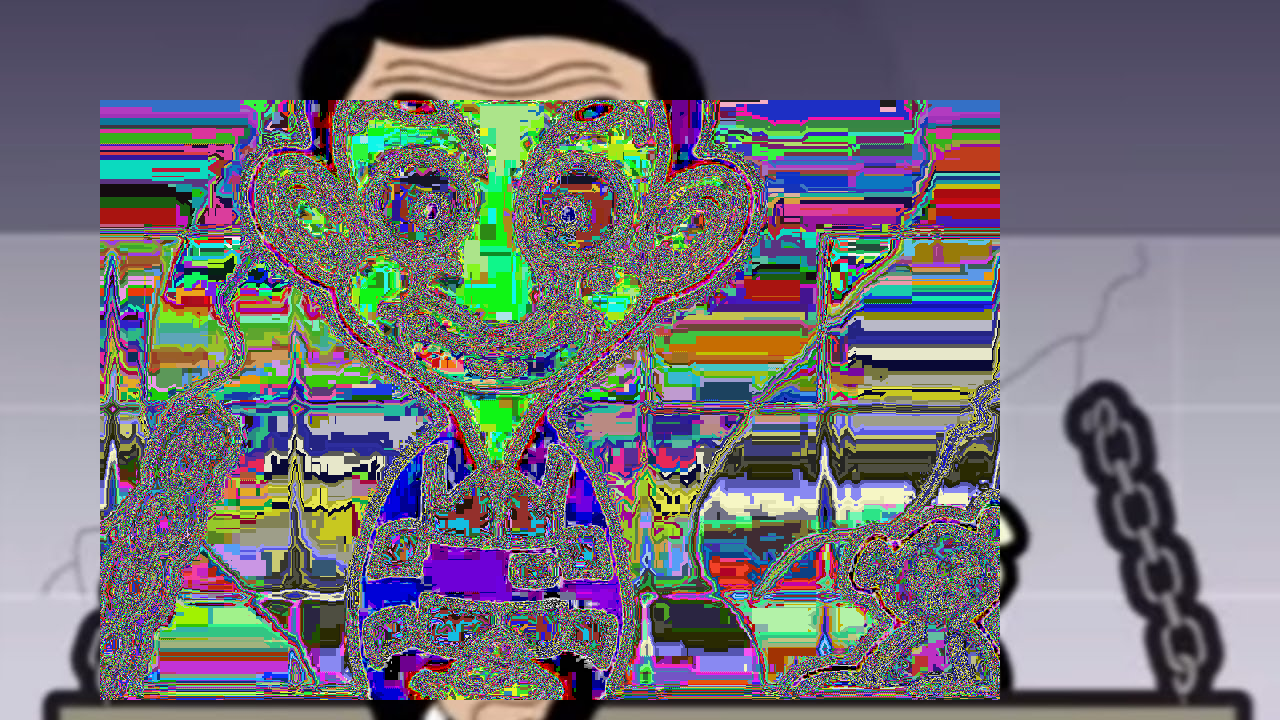

In [30]:
#Step 5: Encryption

for i in range(100,700):
  for j in range(100,1000):
    r,g,b=my_img[i,j]
    C1=power(r,E,N)
    C2=power(g,E,N)
    C3=power(b,E,N)
    enc[i][j]=[C1,C2,C3]
    C1=C1%256
    C2=C2%256
    C3=C3%256
    my_img[i,j]=[C1,C2,C3]


# plt.imshow(my_img, cmap="gray")
cv2_imshow(my_img)


**Step 6: Decryption**

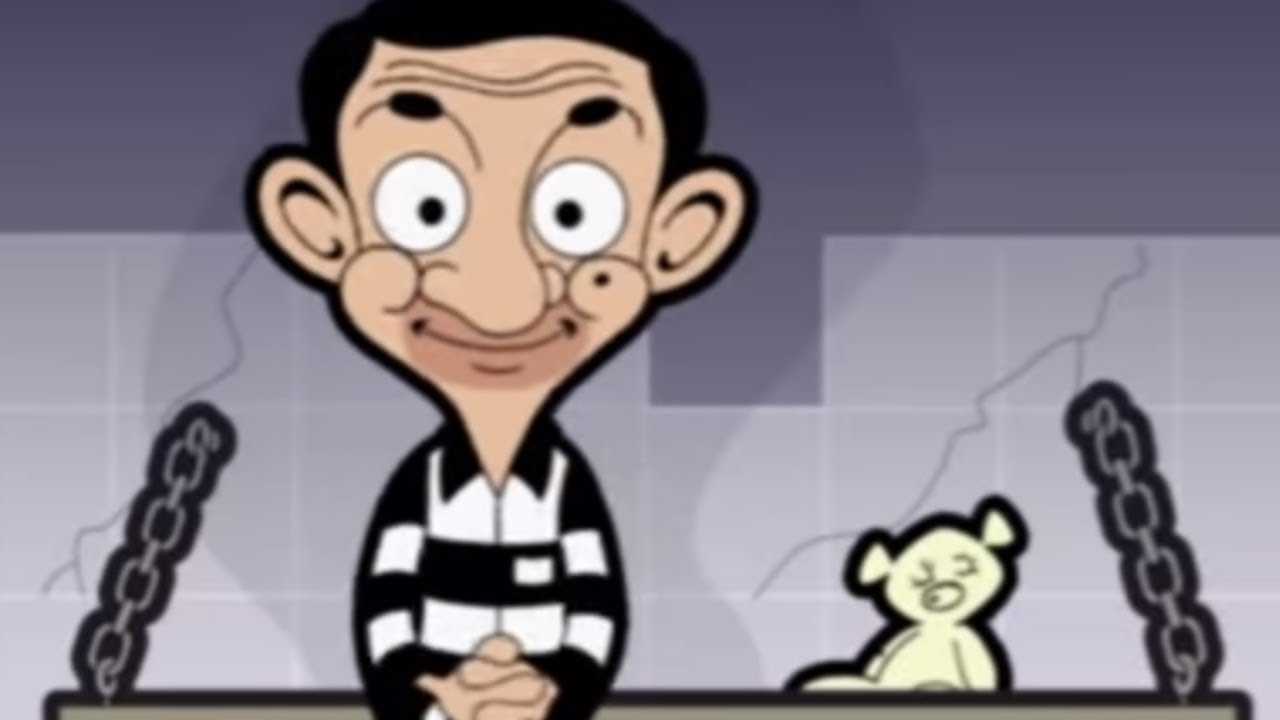

In [28]:
#Step 6: Decryption
for i in range(100,700):
  for j in range(100,1000):
    r,g,b=enc[i][j]
    M1=power(r,D,N)
    M2=power(g,D,N)
    M3=power(b,D,N)
    my_img[i,j]=[M1,M2,M3]

cv2_imshow(my_img)
# plt.imshow(my_img, cmap="gray")

**USING AES ALGORITHM ON THE SAME IMAGE**

In [31]:

# Importing the necessary libraries
import numpy as np
from IPython.display import Image, display
import cv2
from google.colab.patches import cv2_imshow

**LOAD THE IMAGE**

(720, 1280, 3)


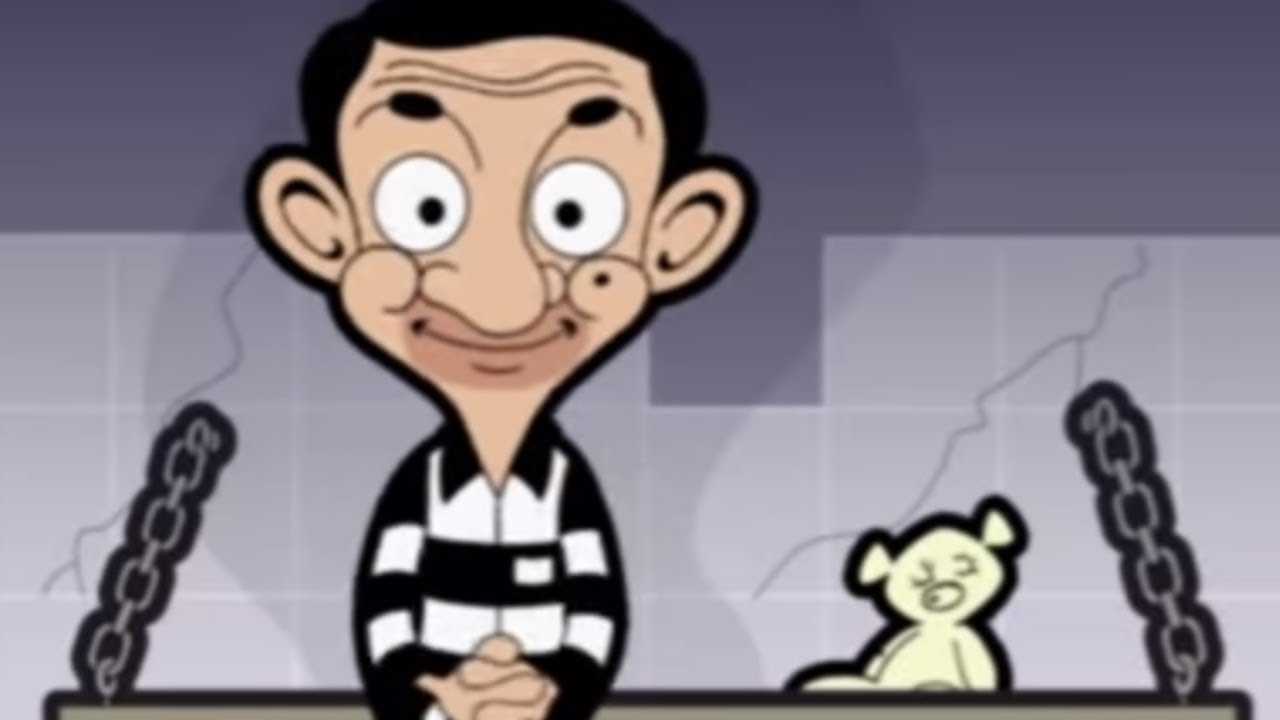


 (720, 1280)


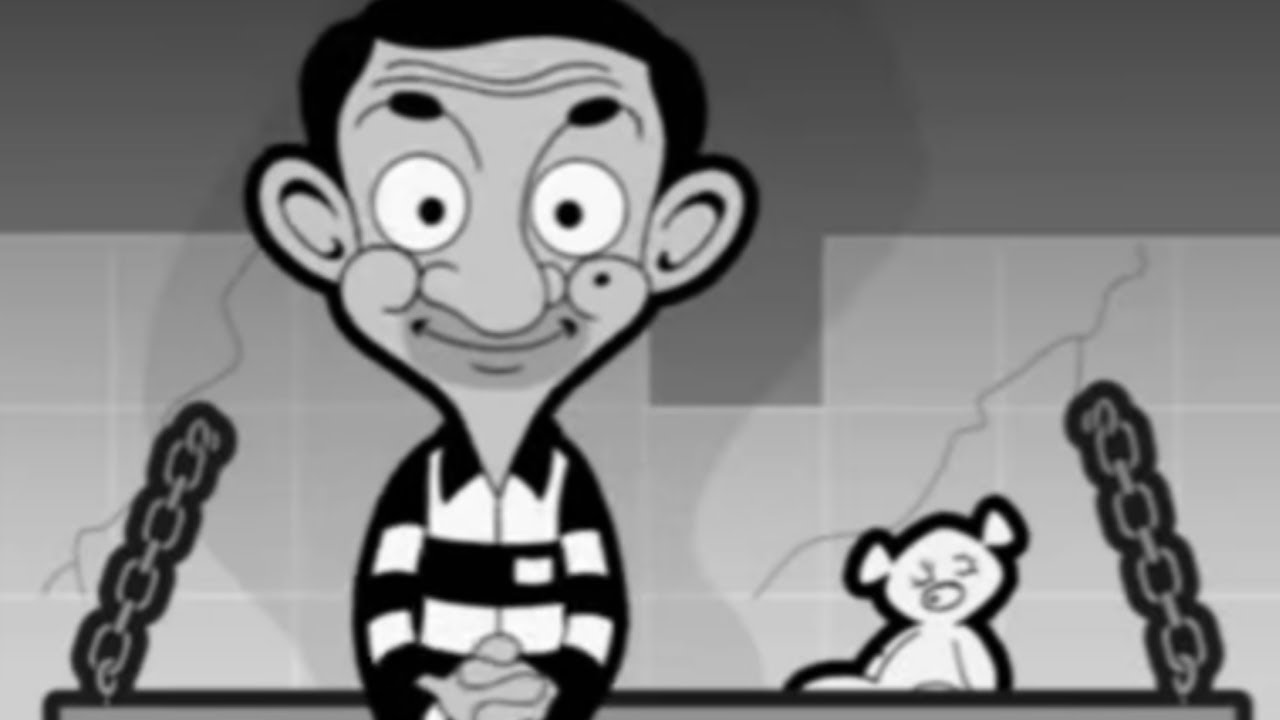


 (256, 256)


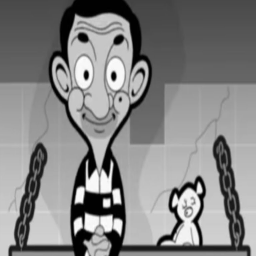

In [32]:

# Loading the image
img=cv2.imread('images/mrbean11.jpg')
print(img.shape)
cv2_imshow(img)

# RGB to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print('\n',img.shape)
cv2_imshow(img)

# Resizing
img=cv2.resize(img,(256,256))
print('\n',img.shape)
cv2_imshow(img)

# print(img)

**ROUND-KEY GENERATION**

In [33]:
# Round Key generation
roundKey=np.random.randint(256,size=(256,256))

**SUB TYPE TRANSFORMATION**

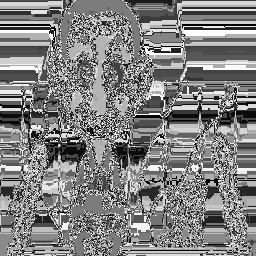

In [34]:
def sub_byte_transform(img):
  sbox = [
        0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
        0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
        0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
        0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
        0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
        0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
        0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
        0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
        0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
        0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
        0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
        0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
        0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
        0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
        0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
        0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
        ]
  
  # Coverting int image matrix to hex
  vhex = np.vectorize(hex)
  img_hex = vhex(img)
  # print(img_hex)

  # Substitute byte transformation
  img_sbt=np.zeros((256,256),int)
  for i in range(256):
    for j in range(256):
      k=int(img_hex[i][j],0)
      img_sbt[i][j]=sbox[k]
  return img_sbt

img_sbt=np.zeros((256,256),int)
img_sbt=sub_byte_transform(img)
# print(img_sbt)
cv2_imshow(img_sbt)

**Shift Row Transform**

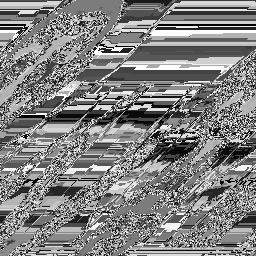

In [35]:
def shift_row_transform(img_sbt):
  img_srt=np.zeros((256,256),int)

  # Converting array to lists so that to lists can be added using '+' sign
  img_sbt=img_sbt.tolist()

  #  Shift rows transformation
  for i in range(256):
    img_srt[i]=img_sbt[i][i:]+img_sbt[i][0:i]
  
  return img_srt

img_srt=np.zeros((256,256),int)
img_srt=shift_row_transform(img_sbt)
# print(img_srt)
cv2_imshow(img_srt)

**GALOIS MULTIPLICATION**

In [36]:
# Galois Multiplication
def galoisMult(a, b):
    p = 0
    hiBitSet = 0
    for i in range(8):
        if b & 1 == 1:
            p ^= a
        hiBitSet = a & 0x80
        a <<= 1
        if hiBitSet == 0x80:
            a ^= 0x1b
        b >>= 1
    return p % 256

**MIX COLUMN TRANSFORMATION**

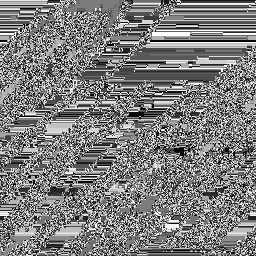

In [37]:
def mix_col_transform(img_srt):
  img_mct=np.zeros((256,256),int)
  temp=[0]*4

  # Applying the transformation on columns of size (4,1) at a time
  for i in range(0,256,4):
    for j in range(256):
      temp[0]=img_srt[i][j]
      temp[1]=img_srt[i+1][j]
      temp[2]=img_srt[i+2][j]
      temp[3]=img_srt[i+3][j]
      
      img_mct[i][j] = galoisMult(temp[0],2) ^ galoisMult(temp[3],1) ^ galoisMult(temp[2],1) ^ galoisMult(temp[1],3)
      img_mct[i+1][j] = galoisMult(temp[1],2) ^ galoisMult(temp[0],1) ^ galoisMult(temp[3],1) ^ galoisMult(temp[2],3)
      img_mct[i+2][j] = galoisMult(temp[2],2) ^ galoisMult(temp[1],1) ^ galoisMult(temp[0],1) ^ galoisMult(temp[3],3)
      img_mct[i+3][j] = galoisMult(temp[3],2) ^ galoisMult(temp[2],1) ^ galoisMult(temp[1],1) ^ galoisMult(temp[0],3)

  return img_mct

img_mct=np.zeros((256,256),int)
img_mct=mix_col_transform(img_srt)
# print(img_mct)
cv2_imshow(img_mct)

**ADDING ROUND KEY TRANSFORMATION**

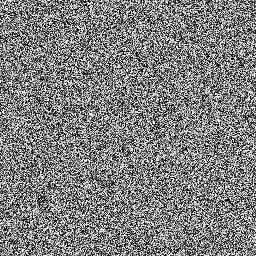

In [38]:
def add_round_key_transform(img_mct,roundKey):
  img_arkt=np.zeros((256,256),int)
  img_arkt=img_mct^roundKey

  return img_arkt

img_arkt=np.zeros((256,256),int)
img_arkt=add_round_key_transform(img_mct,roundKey)
# print(img_arkt)
cv2_imshow(img_arkt)

**DECRYPTYING THE IMAGE with INVERSE TRANSFORMATION**












*****************************************************

**INVERSE ADD ROUND KEY TRANSFORMATION**

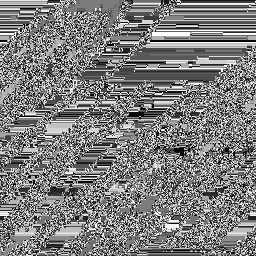

In [39]:

def inverse_add_round_key_transform(img_arkt,roundKey):
  img_iarkt=np.zeros((256,256),int)
  img_iarkt=img_arkt^roundKey

  return img_iarkt

img_iarkt=np.zeros((256,256),int)
img_iarkt=inverse_add_round_key_transform(img_arkt,roundKey)
# print(img_iarkt)
cv2_imshow(img_iarkt)

**INVERSE MIX COLUMN TRANSFORMATION**

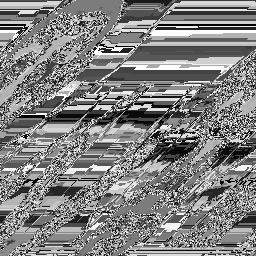

In [40]:
def inv_mix_col_transform(img_iarkt):
  img_imct=np.zeros((256,256),int)
  temp=[0]*4

  # Applying the transformation on columns of size (4,1) at a time
  for i in range(0,256,4):
    for j in range(256):
      temp[0]=img_iarkt[i][j]
      temp[1]=img_iarkt[i+1][j]
      temp[2]=img_iarkt[i+2][j]
      temp[3]=img_iarkt[i+3][j]
      
      img_imct[i][j] = galoisMult(temp[0],14) ^ galoisMult(temp[3],9) ^ galoisMult(temp[2],13) ^ galoisMult(temp[1],11)
      img_imct[i+1][j] = galoisMult(temp[1],14) ^ galoisMult(temp[0],9) ^ galoisMult(temp[3],13) ^ galoisMult(temp[2],11)
      img_imct[i+2][j] = galoisMult(temp[2],14) ^ galoisMult(temp[1],9) ^ galoisMult(temp[0],13) ^ galoisMult(temp[3],11)
      img_imct[i+3][j] = galoisMult(temp[3],14) ^ galoisMult(temp[2],9) ^ galoisMult(temp[1],13) ^ galoisMult(temp[0],11)

  return img_imct

img_imct=np.zeros((256,256),int)
img_imct=inv_mix_col_transform(img_iarkt)
# print(img_imct)
cv2_imshow(img_imct)

**INVERSE SHIFT ROW TRANSFORMATION**

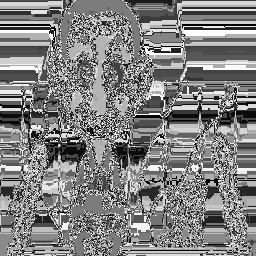

In [41]:
def inv_shift_row_transform(img_imct):
  img_isrt=np.zeros((256,256),int)

  # Converting array to lists so that to lists can be added using '+' sign
  img_imct=img_imct.tolist()

  # Shift rows transformation
  for i in range(256):
    img_isrt[i]=img_imct[i][-i:]+img_imct[i][0:-i]
  
  return img_isrt

img_isrt=np.zeros((256,256),int)
img_isrt=inv_shift_row_transform(img_imct)
# print(img_isrt)
cv2_imshow(img_isrt)

**INVERSE SUB TYPE TRANSFORMATION**

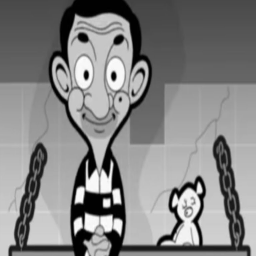

In [42]:
def inv_sub_byte_transform(img_isrt):
  sboxInv = [
        0x52, 0x09, 0x6a, 0xd5, 0x30, 0x36, 0xa5, 0x38, 0xbf, 0x40, 0xa3, 0x9e, 0x81, 0xf3, 0xd7, 0xfb,
        0x7c, 0xe3, 0x39, 0x82, 0x9b, 0x2f, 0xff, 0x87, 0x34, 0x8e, 0x43, 0x44, 0xc4, 0xde, 0xe9, 0xcb,
        0x54, 0x7b, 0x94, 0x32, 0xa6, 0xc2, 0x23, 0x3d, 0xee, 0x4c, 0x95, 0x0b, 0x42, 0xfa, 0xc3, 0x4e,
        0x08, 0x2e, 0xa1, 0x66, 0x28, 0xd9, 0x24, 0xb2, 0x76, 0x5b, 0xa2, 0x49, 0x6d, 0x8b, 0xd1, 0x25,
        0x72, 0xf8, 0xf6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xd4, 0xa4, 0x5c, 0xcc, 0x5d, 0x65, 0xb6, 0x92,
        0x6c, 0x70, 0x48, 0x50, 0xfd, 0xed, 0xb9, 0xda, 0x5e, 0x15, 0x46, 0x57, 0xa7, 0x8d, 0x9d, 0x84,
        0x90, 0xd8, 0xab, 0x00, 0x8c, 0xbc, 0xd3, 0x0a, 0xf7, 0xe4, 0x58, 0x05, 0xb8, 0xb3, 0x45, 0x06,
        0xd0, 0x2c, 0x1e, 0x8f, 0xca, 0x3f, 0x0f, 0x02, 0xc1, 0xaf, 0xbd, 0x03, 0x01, 0x13, 0x8a, 0x6b,
        0x3a, 0x91, 0x11, 0x41, 0x4f, 0x67, 0xdc, 0xea, 0x97, 0xf2, 0xcf, 0xce, 0xf0, 0xb4, 0xe6, 0x73,
        0x96, 0xac, 0x74, 0x22, 0xe7, 0xad, 0x35, 0x85, 0xe2, 0xf9, 0x37, 0xe8, 0x1c, 0x75, 0xdf, 0x6e,
        0x47, 0xf1, 0x1a, 0x71, 0x1d, 0x29, 0xc5, 0x89, 0x6f, 0xb7, 0x62, 0x0e, 0xaa, 0x18, 0xbe, 0x1b,
        0xfc, 0x56, 0x3e, 0x4b, 0xc6, 0xd2, 0x79, 0x20, 0x9a, 0xdb, 0xc0, 0xfe, 0x78, 0xcd, 0x5a, 0xf4,
        0x1f, 0xdd, 0xa8, 0x33, 0x88, 0x07, 0xc7, 0x31, 0xb1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xec, 0x5f,
        0x60, 0x51, 0x7f, 0xa9, 0x19, 0xb5, 0x4a, 0x0d, 0x2d, 0xe5, 0x7a, 0x9f, 0x93, 0xc9, 0x9c, 0xef,
        0xa0, 0xe0, 0x3b, 0x4d, 0xae, 0x2a, 0xf5, 0xb0, 0xc8, 0xeb, 0xbb, 0x3c, 0x83, 0x53, 0x99, 0x61,
        0x17, 0x2b, 0x04, 0x7e, 0xba, 0x77, 0xd6, 0x26, 0xe1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0c, 0x7d
        ]
  
  # Coverting int image matrix to hex
  vhex = np.vectorize(hex)
  img_isrt_hex = vhex(img_isrt)
  # print(img_isrt_hex)

  # Inverse substitute byte transformation
  img_isbt=np.zeros((256,256),int)
  for i in range(256):
    for j in range(256):
      k=int(img_isrt_hex[i][j],0)
      img_isbt[i][j]=sboxInv[k]
  
  return img_isbt

img_isbt=np.zeros((256,256),int)
img_isbt=inv_sub_byte_transform(img_isrt)
# print(img_isbt)
cv2_imshow(img_isbt)